['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']


<Figure size 640x480 with 0 Axes>

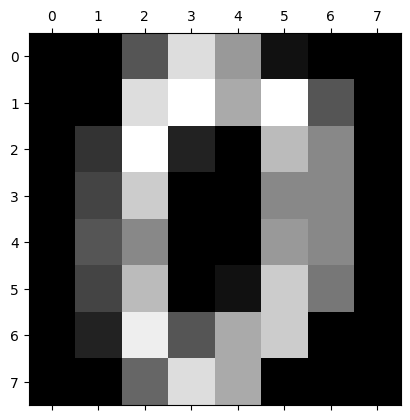

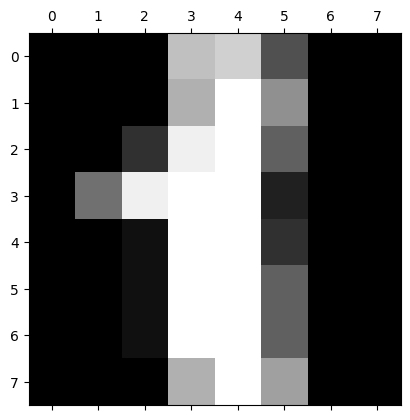

In [ ]:
import pandas as pd
from sklearn.datasets import load_digits

# load the digits dataset
digits = load_digits()
print (dir (digits)) 

# visualize the digits data
import matplotlib.pyplot as plt
plt.gray()
for i in range(2):
    plt.matshow(digits.images[i])


In [ ]:
# create a DataFrame from the digits data
df = pd.DataFrame(digits.data)
df['target'] = digits.target # create a new column 'target' in the DataFrame
df.head() 

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df.drop('target', axis=1), df['target'], test_size=0.2, random_state=42)
 
# Training the model using RandomForestClassifier
model = RandomForestClassifier(n_estimators=20)
model.fit(X_train, y_train)

# evaluate the model's performance on the test set thats equal accuracy_sc
model.score(X_test, y_test) 

0.9805555555555555

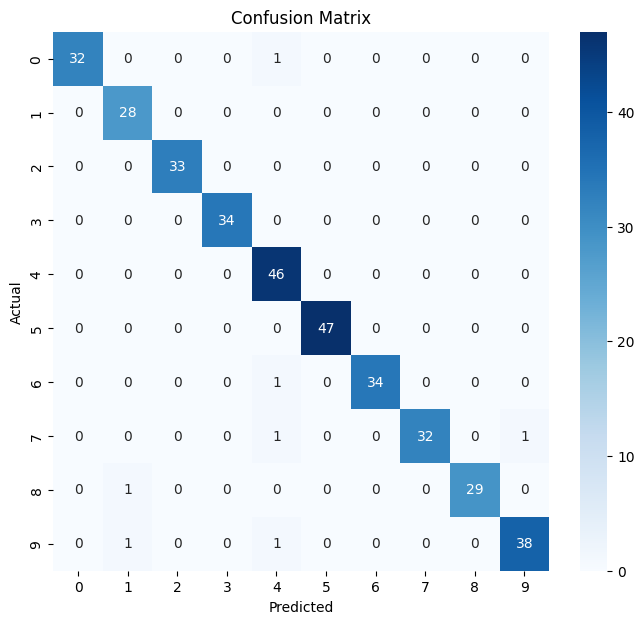

In [39]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

# make predictions and plot confusion matrix
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 7))
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()